In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df=pd.read_csv('../Deeplearning/Datasets/car_sales_data.csv')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [275]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [276]:
df['Car Make'].unique()

array(['Nissan', 'Ford', 'Honda', 'Toyota', 'Chevrolet'], dtype=object)

In [277]:
df['Car Model'].unique()

array(['Altima', 'F-150', 'Civic', 'Silverado', 'Corolla'], dtype=object)

In [278]:
df['Date']=pd.to_datetime(df['Date'])

In [279]:
df.dtypes

Date                 datetime64[ns]
Salesperson                  object
Customer Name                object
Car Make                     object
Car Model                    object
Car Year                      int64
Sale Price                    int64
Commission Rate             float64
Commission Earned           float64
dtype: object

In [280]:
df.describe(include='all')

C:\Users\svygralingam\AppData\Local\Temp\2\ipykernel_7564\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
count,2500000,2500000,2500000,2500000,2500000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
unique,366,518657,518251,5,5,NaN,NaN,NaN,NaN
top,2022-12-24 00:00:00,Michael Smith,Michael Smith,Honda,Silverado,NaN,NaN,NaN,NaN
freq,7144,1229,1167,500687,500842,NaN,NaN,NaN,NaN
first,2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,NaN,NaN,NaN,NaN,NaN,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,NaN,NaN,NaN,NaN,NaN,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,NaN,NaN,NaN,NaN,NaN,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03


In [281]:
df.isna().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [282]:
avg_sales_price=df.groupby('Car Make')['Sale Price'].mean()
avg_sales_price

Car Make
Chevrolet    30015.431557
Ford         29994.461240
Honda        30032.532548
Nissan       30016.451923
Toyota       30001.989895
Name: Sale Price, dtype: float64

In [283]:
avg_sales_price.idxmax()

'Honda'

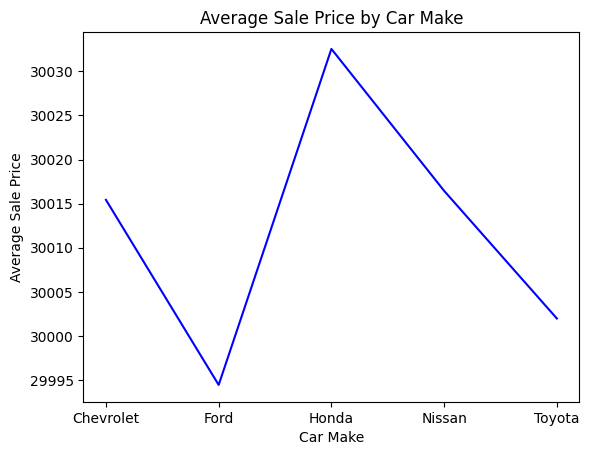

In [284]:
plt.plot(avg_sales_price, 'b-', label='Average Sale Price')
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Make')
plt.show()

In [285]:
commission_earn=df.groupby('Customer Name')['Commission Earned'].sum().head(5).sort_values(ascending=False)
commission_earn

Customer Name
Aaron Adams        61605.92
Aaron Acevedo      14165.76
Aaron Acosta       12187.76
Aaron Adams DDS     5697.58
Aaron Abbott        2186.30
Name: Commission Earned, dtype: float64

<Axes: xlabel='Customer Name'>

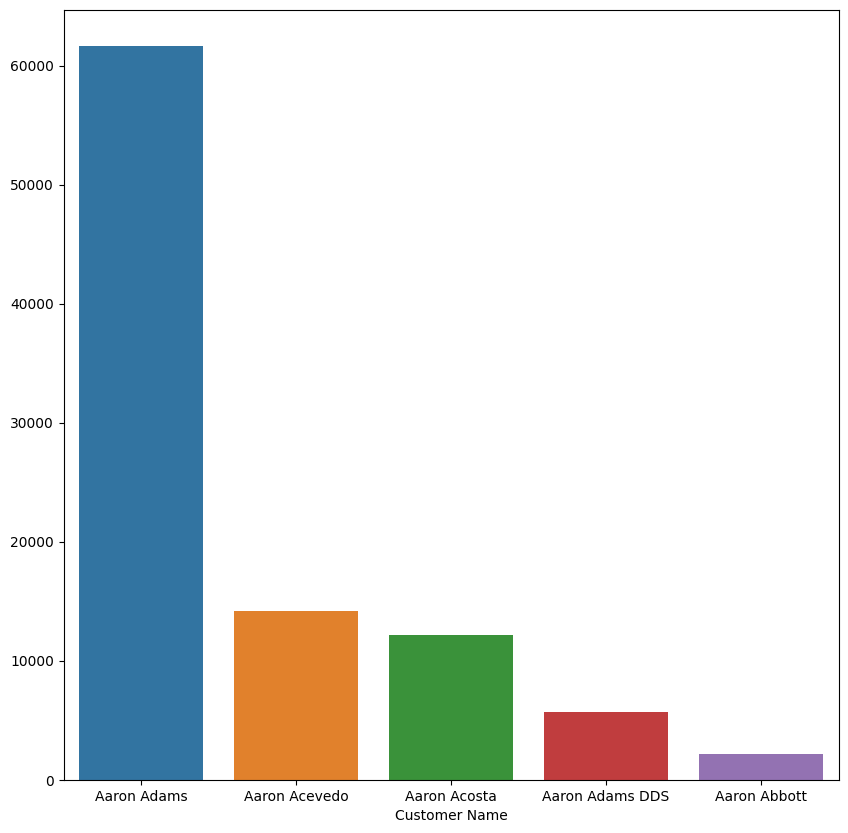

In [286]:
plt.figure(figsize=(10,10))
sns.barplot(x=commission_earn.index,y=commission_earn.values)

In [287]:
df['Month']=df['Date'].dt.month.astype(str)
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,6


In [288]:
df.groupby('Month').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=False)

,Sale Price
Month,
8,30052.312136
4,30046.320463
12,30044.549012
7,30026.342485
2,30022.099481
3,30017.099773
10,30005.927963
11,30003.693248
6,29998.136398


In [289]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,6


In [290]:
df.drop('Month',axis=1,inplace=True)

In [291]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [292]:
df['Salesperson'].unique()

array(['Monica Moore MD', 'Roberto Rose', 'Ashley Ramos', ...,
       'Tricia Perez', 'Christine Hodge DDS', 'Mr. Calvin Hardin'],
      dtype=object)

In [293]:
df['Customer Name'].unique()

array(['Mary Butler', 'Richard Pierce', 'Sandra Moore', ...,
       'Anna Callahan', 'Donald Watkins PhD', 'Mrs. Suzanne Glenn PhD'],
      dtype=object)

In [294]:
df.drop(['Salesperson','Customer Name','Date'],axis=1,inplace=True)

In [295]:
df

,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,Nissan,Altima,2018,15983,0.070495,1126.73
1,Nissan,F-150,2016,38474,0.134439,5172.40
2,Ford,Civic,2016,33340,0.114536,3818.63
3,Ford,Altima,2013,41937,0.092191,3866.20
4,Honda,Silverado,2022,20256,0.113490,2298.85
...,...,...,...,...,...,...
2499995,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,Ford,F-150,2022,18803,0.068339,1284.97
2499997,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,Honda,Silverado,2014,26125,0.088260,2305.80


In [296]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['Car Make','Car Model']

for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [297]:
df.head()

,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,3,0,2018,15983,0.070495,1126.73
1,3,3,2016,38474,0.134439,5172.40
2,1,1,2016,33340,0.114536,3818.63
3,1,0,2013,41937,0.092191,3866.20
4,2,4,2022,20256,0.113490,2298.85


In [298]:
X=df.drop('Sale Price',axis=1)
Y=df['Sale Price']

In [299]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [300]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_train)

d:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import ReLU

In [302]:
model=Sequential()

In [303]:
model.add(Dense(units=128,activation=ReLU()))

model.add(Dense(units=64,activation=ReLU()))
model.add(Dropout(0.2))

model.add(Dense(units=32,activation=ReLU()))
model.add(Dropout(0.3))

model.add(Dense(1,activation='linear'))


In [304]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [305]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [306]:
import tensorflow as tf
early_stops=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.02,
    verbose=1,
    patience=30,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [307]:
model.fit(X_train,Y_train,validation_split=0.3,batch_size=10000,epochs=500,callbacks=early_stops)

Epoch 1/500
140/140 [==============================] - 8s 43ms/step - loss: 1021312256.0000 - mae: 29801.7344 - val_loss: 967776128.0000 - val_mae: 28907.7344
Epoch 2/500
140/140 [==============================] - 5s 37ms/step - loss: 636937728.0000 - mae: 22075.7168 - val_loss: 219810448.0000 - val_mae: 12072.7930
Epoch 3/500
140/140 [==============================] - 5s 37ms/step - loss: 178491888.0000 - mae: 10892.8926 - val_loss: 136883424.0000 - val_mae: 9698.8223
Epoch 4/500
140/140 [==============================] - 5s 37ms/step - loss: 164404368.0000 - mae: 10471.9805 - val_loss: 128677232.0000 - val_mae: 9403.1152
Epoch 5/500
140/140 [==============================] - 5s 38ms/step - loss: 155534944.0000 - mae: 10179.0166 - val_loss: 119369304.0000 - val_mae: 9056.4326
Epoch 6/500
140/140 [==============================] - 5s 38ms/step - loss: 145917408.0000 - mae: 9854.7041 - val_loss: 108697272.0000 - val_mae: 8641.9980
Epoch 7/500
140/140 [==============================] - 5

In [270]:
y_pred=model.predict(X_test)
y_pred=(y_pred>=0.5)

62500/62500 [==============================] - 115s 2ms/step


In [271]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [500000, 2000000]